# 3 Visualization with Python using Plotly

### 3.1 Time Series Plots
### 3.2 Candlestick Chart
### 3.3 Scatter Plots
### 3.4 Heatmaps/Correlation Matrix
### 3.5 Pairplot

**Plotly**: Plotly is a Python library used for creating interactive and publication-quality graphs and visualizations. It provides a wide range of chart types, including scatter plots, line plots, bar charts, heatmaps, and more. Plotly allows users to create interactive graphs that can be embedded in web applications or exported in various formats for presentations or reports. It offers APIs for Python, R, JavaScript, and other programming languages.

**Seaborn**: Seaborn is a statistical data visualization library built on top of Matplotlib, another popular plotting library in Python. Seaborn simplifies the process of creating attractive and informative statistical graphics. It provides a high-level interface for drawing informative statistical graphics, such as violin plots, box plots, scatter plots, and heatmaps. Seaborn is particularly useful for visualizing complex datasets and for exploring relationships between variables in data. It also offers built-in themes and color palettes to enhance the aesthetics of plots.

## Getting and Exploring Our Data

At this point in the course, you already know how to use basic Pandas functions. Now we are going to fetch real-time data using the **yfinance** module.

**yfinance** is a Python library that provides a simple way to download historical market data from Yahoo Finance. It allows users to easily access various financial data such as stock prices, trading volumes, dividends, and more, directly from Yahoo Finance's website.

In order to download and use the data, we first need to import the module.


In [ ]:
import yfinance as yf

Next, we are going to select the asset we are interested in analyzing.

You can see all the assets available in **yfinance** by exploring the data available on Yahoo Finance's website directly:

[Yahoo Finance Lookup](https://finance.yahoo.com/lookup)

You can get data of the following assets:

* **Stocks and ETFs**
* **Cryptocurrencies**
* **Indices**
* **Currencies**
* **Commodities**


In [ ]:
asset = "TSLA"

Finally, we need to specify the window of time for which we are downloading the data. You can do that by giving a number followed by letters denoting periods of time:

* **d**: days
* **mo**: months
* **y**: years
* **ytd**: year to date
* **max**: maximum available data

In [ ]:
time= "5y"

Let's see the downloaded data.

In [ ]:
data = yf.download(tickers=asset, period=time)
data.head()

[*********************100%%**********************]  1 of 1 completed


Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2019-07-08  15.416000  15.483333  15.244000  15.356000  15.356000   88207500
2019-07-09  15.264667  15.400000  15.152000  15.337333  15.337333   92862000
2019-07-10  15.610000  15.929333  15.542667  15.928000  15.928000  137185500
2019-07-11  15.876000  16.100000  15.720000  15.906667  15.906667  112716000
2019-07-12  15.983333  16.358667  15.980667  16.338667  16.338667  138007500

In the following section, we will explore the fundamentals of plotting, with a specific focus on exploring some of the most essential plots for analyzing and comprehending financial data. Through this exploration, we aim to gain a deeper understanding of how visualizations play a crucial role in uncovering insights within the realm of finance.



## Plotly

### 3.1 Time Series Plots

Plotly allows for interactive time series plots, which are crucial in finance for visualizing trends, patterns, and fluctuations in stock prices, market indices, or other time-dependent financial data.

A time series plot is a graphical representation of data points collected or recorded over a period of time, typically at regular intervals. In a time series plot, time is represented on the horizontal axis (x-axis), while the corresponding values of the variable being measured or observed are represented on the vertical axis (y-axis). Each data point on the plot corresponds to a specific time point, allowing for the visualization of trends, patterns, and changes over time.

In order to create a plot with Plotly, first we import the Plotly Express module.

In [ ]:
import plotly.express as px

Then we add a trace to the figure:

- **px.line**: This specifies the type of trace you're adding. In this case, it's a line plot.
- **x = data.index**: This specifies the x-values for the line plot. Normally, these are dates; in this example, we are going to use the index from our downloaded DataFrame.
- **y = data['Close']**: This specifies the y-values for the line plot. It's using the 'Close' column from the DataFrame `data`, representing the closing prices of the asset.
- **name**: This assigns a name to the trace, which will appear in the legend when you display the plot.

Finally, we display the figure using **fig.show()**.

In [ ]:
fig = px.line(x=data.index, y=data['Close'], title='Sample Plot')
fig.show()

We can also plot more than one column; indeed, we can plot the entire DataFrame. The x-values will always be, by default, the index of the DataFrame.

In [ ]:
fig = px.line(data, title='Sample Plot')
fig.show()

In the displayed plot, you will only be able to see the blue and orange lines. Why is that?

Let's remember what volume is: Volume measures the number of shares traded in a given asset. The amount of money moved in the market is much greater than any of the other price-related variables. The differences between these values are so significant that the price-related variables appear very small and thus aren't visible.

Note that Plotly allows us to select and deselect the data displayed. You can click on the labels to toggle the visibility of different time series.

Can you see the missing variables now?

### 3.2 Candlestick Chart

Candlestick charts are widely used in finance to represent the open, high, low, and close prices of a financial instrument over time. Plotly's interactive capabilities make it ideal for exploring detailed price movements.

For this, we are going to use another submodule of Plotly.

In [ ]:
import plotly.graph_objects as go

In order to plot a candlestick figure, the steps are very similar to before:

* Create a Plotly figure
* Add a trace
* Plot the figure

In [ ]:
# Create a Plotly figure object
fig = go.Figure()

In [ ]:
# We use go.Candlestick to specify the kind of trace we are adding
fig = fig.add_trace(go.Candlestick(x=data.index,
                             open=data['Open'],
                             high=data['High'],
                             low=data['Low'],
                             close=data['Close'],
                             name='Tesla'))

In [ ]:
fig.show()

We are going to use **go.Candlestick**. You will notice that Candlestick has many more parameters:

* **open**: The open price is the price level at which the asset started trading during the specified time period. It is represented by the left side of the candlestick's body.

* **high**: The high price is the highest price level reached by the asset during the specified time period. It is represented by the top of the upper shadow (or "wick") of the candlestick.

* **low**: The low price is the lowest price level reached by the asset during the specified time period. It is represented by the bottom of the lower shadow (or "wick") of the candlestick.

* **close**: The close price is the price level at which the asset ended trading during the specified time period. It is represented by the right side of the candlestick's body.


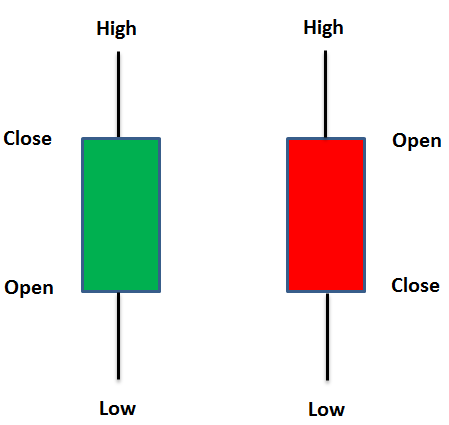

Notice that you can add more than one trace, even of different types, like scatter and candlesticks. However, it is not recommended since a candlestick figure is often used for singular data analysis.

### 3.3 Scatter Plots

Interactive scatter plots can be utilized to visualize relationships between financial variables, such as the correlation between stock returns, trading volume, or other financial metrics. Adding hover information can enhance understanding by displaying specific data points.

The way to plot these figures is exactly the same as a time series plot, however, we change the mode to "markers" instead of "lines".

Generally speaking, we are going to compare two variables.

Firstly, let's fetch some more data.

In [ ]:
data2 = yf.download(tickers="GOOG", period="1y")
data3 = yf.download(tickers="META", period="1y")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Now we display the scatter plot using the graphic object module of Plotly by passing **go.Scatter** to the **add_trace** function.

In [ ]:
fig = go.Figure()

# Notice how we use go.Scatter instead of go.Candlestick
fig.add_trace(go.Scatter(x=data2['Close'],
                         y=data3['Close'],
                         mode='markers'))
fig.show()

To enhance the clarity and explanatory power of the plot, we can modify several aspects of the layout. We can adjust the size of the markers, add gridlines, and use annotations to provide more context.

Here's an improved version of the code with a more detailed layout:

In [ ]:
# Add a title and axis labels
fig.update_layout(
    title='Google vs Facebook Correlation',
    xaxis_title='Google Close Price',
    yaxis_title='Facebook Close Price'
)

fig.show()

This plot is useful for identifying relationships, such as linear relationships, between the closing prices of Google and Facebook.

For instance, as you can see, there appears to be a certain degree of linearity between the closing prices of Google and Facebook. This suggests that as the closing price of Google changes, the closing price of Facebook tends to change in a similar manner.

### 3.4 Heatmaps/Correlation Matrix

A heatmap is a graphical representation of data where individual values are represented as colors. This visualization is useful for showing the magnitude of data values across a two-dimensional space, often in a matrix format. Heatmaps are commonly used to display the results of complex data analyses, such as clustering, to easily identify patterns, trends, and outliers in data.

Key Features:

* **Color Intensity**: Represents the magnitude of the value. Darker or more intense colors indicate higher values, while lighter colors indicate lower values.
* **Axes**: Typically, the rows and columns represent different variables or categories.
* **Legend**: Often includes a color bar to indicate the mapping of colors to data values.

**Correlation Matrix Visual**

A correlation matrix visual is a special type of heatmap used to show the correlation coefficients between variables in a dataset. The correlation coefficient is a measure of the strength and direction of the relationship between two variables, ranging from -1 to 1.


In order to generate a correlation matrix, we can use Pandas' built-in function `.corr()`.

For example:


In [ ]:
corr = data.corr()
corr

Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.999130  0.998823  0.997538   0.997538 -0.467770
High       0.999130  1.000000  0.998841  0.998905   0.998905 -0.459138
Low        0.998823  0.998841  1.000000  0.999007   0.999007 -0.476078
Close      0.997538  0.998905  0.999007  1.000000   1.000000 -0.465735
Adj Close  0.997538  0.998905  0.999007  1.000000   1.000000 -0.465735
Volume    -0.467770 -0.459138 -0.476078 -0.465735  -0.465735  1.000000

However, as the number of variables increases, it becomes increasingly difficult to understand and interpret the data.

In [ ]:
fig = px.imshow(corr, text_auto=".3f")
fig.show()

Now let's analyze the results.
Why are most values almost 1.0?

That is because the Open, High, Low, Close, and Adjusted Close values are almost the same. This means that the variance of such values is small during the day.

In the case of volume, we observe an inverse correlation with other indicators, meaning that when the volume is low, the price tends to rise.

Let's calculate another correlation matrix using only the Adj Close, the volume, and the growth rate of the stock, which is the cumulative difference in the price of the stock.

In [ ]:
# Create a new DataFrame with selected columns
new_data = data[['Adj Close', 'Volume']].copy()

In [ ]:
# Calculate the growth rate and add it to the new DataFrame
new_data['GR'] = data['Adj Close'].pct_change()
new_data

In [ ]:
# Calculate the cumulative difference in price and add it to the new DataFrame
new_data['Price Difference'] = data['Adj Close'] - data['Adj Close'].iloc[0]
new_data

Adj Close     Volume        GR  Price Difference
Date                                                         
2019-07-05   15.540000  105985500       NaN          0.000000
2019-07-08   15.356000   88207500 -0.011840         -0.184000
2019-07-09   15.337333   92862000 -0.001216         -0.202667
2019-07-10   15.928000  137185500  0.038512          0.388000
2019-07-11   15.906667  112716000 -0.001339          0.366667
...                ...        ...       ...               ...
2024-06-27  197.419998   72746500  0.005347        181.879998
2024-06-28  197.880005   95438100  0.002330        182.340005
2024-07-01  209.860001  135691400  0.060542        194.320001
2024-07-02  231.259995  205047900  0.101973        215.719995
2024-07-03  246.389999  166561500  0.065424        230.849999

[1258 rows x 4 columns]

In [ ]:
corr = new_data.corr()

In [ ]:
fig = px.imshow(corr, text_auto=".3f")
fig.show()

As you can see, we have a much more interesting plot to analyze.

The purple tiles indicate that there is not a direct relationship between the variables.

The blue tiles indicate that there is an inverse relationship between the variables.

Finally, the yellow tiles indicate that there is a direct relationship between the variables.

Now, as we can see, we can use a correlation matrix to analyze the dynamics between indicators of the same stock.

However, a correlation matrix can also be used to analyze exogenous variables, which are external factors that may affect a stock's price.

Let's illustrate this with examples using gold and oil values:

* **GLD**: SPDR Gold shares
* **USO**: United States Oil Fund

And two unrelated industries:

* **AAL**: American Airlines
* **BAC**: Bank of America

In [ ]:
# Define the ticker symbols
tickers = ["GLD", "USO", "AAL", "BAC"]

In [ ]:
# Fetch the data
ex_df = yf.download(tickers, period="1y")

[*********************100%%**********************]  4 of 4 completed


In [ ]:
# Select only the Adj Close columns
ex_df = ex_df['Adj Close']
ex_df.head()

Ticker            AAL        BAC         GLD        USO
Date                                                   
2023-07-05  18.320000  28.239420  177.839996  64.629997
2023-07-06  17.879999  27.462543  177.309998  64.440002
2023-07-07  18.350000  27.705318  178.639999  65.849998
2023-07-10  18.570000  27.831558  178.779999  65.540001
2023-07-11  18.799999  28.181152  179.449997  67.029999

In [ ]:
corr = ex_df.corr()
fig = px.imshow(corr, text_auto=".3f")
fig.show()

As we can see, the gold value is strongly related to BAC, suggesting that the increment in gold value is correlated with BAC's performance.
* What does this mean, and why does this happen?

On the other hand, the oil value is inversely related to the AAL stock price. This can be explained since lower fuel costs make the airline more profitable.

### 3.5 Pairplot

We already know how to show visually when some variables are related. However, what does their relationship look like? We can use scatter plots.

A pairplot is a visualization technique used to display the pairwise relationships between multiple variables in a dataset. It is particularly useful for exploring the structure of data and understanding the relationships between different variables. A pairplot can display scatter plots for each pair of variables and histograms or density plots for the distribution of individual variables along the diagonal.

In [ ]:
# We use scatter_matrix to indicate the pairplot
fig = px.scatter_matrix(ex_df)
fig.show()

While a heatmap provides a visual representation of the correlation matrix, showing the strength and direction of linear relationships between pairs of variables, it doesn't offer insights into the distribution and nature of these relationships.

By using a pairplot, which creates scatter plots for each pair of variables and histograms for their distributions, we can delve deeper into these relationships.

What kind of relationships among variables you can see?

### Excercises



For the following exercises we are going to use Warren's Buffet portfolio data.

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
company_list = pd.read_csv("/content/drive/MyDrive/Cuentas/Courses and workshops/AI in Finance: Data-Driven Investment Strategies with Python/Module 3/Company List.csv",sep=';')
company_list

Name Symbol       Holdings  \
0                                  Amazon.com, Inc.   AMZN          533,3   
1                          American Express Company    AXP    151,610,700   
2                                        Apple Inc.   AAPL  1,003,466,264   
3                        Axalta Coating Systems Ltd   AXTA     23,535,041   
4                              Bank of America Corp    BAC  1,032,852,006   
5                      Bank of New York Mellon Corp     BK     74,346,864   
6                                 Barrick Gold Corp   GOLD     20,918,701   
7                                        Biogen Inc   BIIB        643,022   
8                        Charter Communications Inc   CHTR      5,213,461   
9                                      Coca-Cola Co     KO    400,000,000   
10                     Costco Wholesale Corporation   COST      4,333,363   
11                                       DaVita Inc    DVA     36,095,570   
12                           General Motors Company     GM     74,681,000   
13                                   Globe Life Inc     GL      6,353,727   
14                                Johnson & Johnson    JNJ          327,1   
15                             JPMorgan Chase & Co.    JPM     22,208,427   
16                                   Kraft Heinz Co    KHC    325,634,818   
17                                        Kroger Co     KR     21,940,079   
18                       Liberty Global PLC Class A  LBTYA     18,010,000   
19                       Liberty Global PLC Class C  LBTYK      7,346,968   
20                Liberty Latin America Ltd Class A   LILA      2,630,792   
21                Liberty Latin America Ltd Class C  LILAK      1,284,020   
22                 Liberty Sirius XM Group Series A  LSXMA     14,860,360   
23                 Liberty Sirius XM Group Series C  LSXMK     43,208,291   
24                             M&T Bank Corporation    MTB      4,536,174   
25                                   Mastercard Inc     MA      4,564,756   
26          MONDELEZ INTERNATIONAL INC Common Stock   MDLZ            578   
27                              Moody’s Corporation    MCO     24,669,778   
28                 PNC Financial Services Group Inc    PNC      5,350,586   
29                              Procter & Gamble Co     PG          315,4   
30  Restoration Hardware Holdings, Inc common stock     RH      1,708,348   
31                           Sirius XM Holdings Inc   SIRI     50,000,000   
32                                    Snowflake Inc   SNOW      6,125,376   
33                           SPDR S&P 500 ETF Trust    SPY           39,4   
34                                      StoneCo Ltd   STNE     14,166,748   
35                               Store Capital Corp   STOR     24,415,168   
36                               Suncor Energy Inc.     SU     19,201,525   
37                              Synchrony Financial    SYF     20,128,000   
38               Teva Pharmaceutical Industries Ltd   TEVA     42,789,295   
39                                     U.S. Bancorp    USB    149,590,275   
40                      United Parcel Service, Inc.    UPS           59,4   
41                      Vanguard 500 Index Fund ETF    VOO             43   
42                                   Verisign, Inc.   VRSN     12,815,613   
43                                         Visa Inc      V      9,987,460   
44                                 Wells Fargo & Co    WFC    136,340,848   
45                                            TOTAL                         

   Market Price             Value  Stake  
0     $3,272.71    $1,745,336,243   0.1%  
1       $104.91   $15,905,478,537  18.8%  
2       $119.02  $119,432,554,741   5.9%  
3        $25.64      $603,438,451  10.0%  
4        $24.24   $25,036,332,625  11.9%  
5        $38.02    $2,826,667,769   8.4%  
6        $27.57      $576,728,587   1.2%  
7       $280.01      $180,052,590   0.4%  
8       $633.92    $3,304,917,197   2.5%

In [ ]:
portfolio = pd.read_csv("/content/drive/MyDrive/Cuentas/Courses and workshops/AI in Finance: Data-Driven Investment Strategies with Python/Module 3/portfolio_stocks.csv")
portfolio = portfolio.set_index('Date')
portfolio


AMZN         AXP        AAPL       AXTA        BAC  \
Date                                                                            
2016-11-01 00:00:00   39.270500   59.458359   25.774115  25.110001  13.979829   
2016-11-02 00:00:00   38.278000   58.740379   25.797226  25.000000  13.870413   
2016-11-03 00:00:00   38.351501   58.632687   25.520720  24.540001  13.870413   
2016-11-04 00:00:00   37.752499   58.794224   25.290674  24.530001  13.929330   
2016-11-07 00:00:00   39.246498   60.131481   25.655489  25.049999  14.316490   
...                         ...         ...         ...        ...        ...   
2020-10-12 00:00:00  172.146500  101.870232  121.875061  25.930000  23.421843   
2020-10-13 00:00:00  172.181503  100.341362  118.642036  24.940001  22.756029   
2020-10-14 00:00:00  168.185501  100.150269  118.730202  25.299999  21.542988   
2020-10-15 00:00:00  166.932495   99.787170  118.259949  25.639999  22.026379   
2020-10-16 00:00:00  163.635498  100.245819  116.604248  25.639999  22.108467   

                            BK       GOLD        BIIB        CHTR         KO  \
Date                                                                           
2016-11-01 00:00:00  35.437130  15.751805  282.559998  249.570007  32.892071   
2016-11-02 00:00:00  35.004375  15.520799  277.260010  252.910004  32.837406   
2016-11-03 00:00:00  35.143188  15.683356  273.489990  247.419998  32.821781   
2016-11-04 00:00:00  35.102364  15.632025  277.000000  250.229996  32.556278   
2016-11-07 00:00:00  35.951546  14.844861  295.619995  257.160004  33.157581   
...                        ...        ...         ...         ...        ...   
2020-10-12 00:00:00  33.629307  24.995447  291.480011  651.719971  45.550644   
2020-10-13 00:00:00  32.802143  24.924129  291.459991  649.950012  44.774971   
2020-10-14 00:00:00  32.544209  25.236130  289.019989  638.619995  44.685814   
2020-10-15 00:00:00  33.113445  24.736935  280.630005  636.890015  44.569912   
2020-10-16 00:00:00  33.816093  24.576477  280.010010  633.919983  44.605579   

                     ...       STNE         SU        SYF       TEVA  \
Date                 ...                                               
2016-11-01 00:00:00  ...        NaN  22.750605  23.540583  41.332932   
2016-11-02 00:00:00  ...        NaN  22.522949  23.425188  41.534237   
2016-11-03 00:00:00  ...        NaN  22.424294  23.292704  37.575397   
2016-11-04 00:00:00  ...        NaN  22.143518  23.367222  38.572296   
2016-11-07 00:00:00  ...        NaN  22.765783  24.104179  39.089916   
...                  ...        ...        ...        ...        ...   
2020-10-12 00:00:00  ...  58.119999  10.970238  26.244719   9.450000   
2020-10-13 00:00:00  ...  58.509998  10.798021  25.944727   9.370000   
2020-10-14 00:00:00  ...  57.570000  10.651636  26.062902   9.290000   
2020-10-15 00:00:00  ...  58.000000  10.453588  26.453800   9.310000   
2020-10-16 00:00:00  ...  57.900002  10.229704  26.708334   9.410000   

                           USB         UPS         VOO        VRSN  \
Date                                                                 
2016-11-01 00:00:00  34.093571   83.987297  169.697922   83.089996   
2016-11-02 00:00:00  33.740822   84.034431  168.576965   80.830002   
2016-11-03 00:00:00  33.779163   84.490395  167.920151   80.389999   
2016-11-04 00:00:00  33.687145   84.065887  167.692383   79.769997   
2016-11-07 00:00:00  34.446312   86.314156  171.370651   81.879997   
...                        ...         ...         ...         ...   
2020-10-12 00:00:00  34.338680  158.138687  306.792542  214.149994   
2020-10-13 00:00:00  33.189739  157.054825  304.830841  216.000000   
2020-10-14 00:00:00  33.042885  156.203827  302.925934  212.139999   
2020-10-15 00:00:00  33.811714  155.899277  302.565796  208.600006   
2020-10-16 00:00:00  33.811714  156.257599  302.309967  207.339996   

                              V        WFC  
Date                                   

Now, let's do some exploratory data analysis


### Excercise:
Plot the closing price of each stock in the portfolio dataset on the same graph

In [ ]:
# Plot the closing values using plotly express
fig = #Your code goes here
fig.show()

In [ ]:
#@title Solution
# Plot the closing values using plotly express
fig = px.line(portfolio)
fig.show()

However, the data presented above is not ideal for analysis due to the potentially large fluctuations in stock prices. Therefore, let's consider a different approach.

### Excercise:
Calculate the growth rate of each stock and plot them on the same graph.


In [ ]:
#Calculate the daily growth rate for each stock
growth_rates = #Your code goes here

#Plot the growth rates using plotly express
fig = #Your code goes here
fig.show()

In [ ]:
#@title Solution
# Calculate the daily growth rate for each stock
growth_rates = portfolio.pct_change()

# Plot the growth rates using plotly express
fig = px.line(growth_rates)
fig.show()

As we can see, we are beginning to gain a better understanding of the portfolio's behavior.

For instance, many of these actions spike at the same points in time. Take March 2020, for example, which appears to be a significant low point in growth. What events occurred during that period?

### Excercise
Calculate the cumulative growth rate over time of each of the stock actions, remember the previous lessons.



In [ ]:
# Calculate the cumulative growth rate for each stock
cumulative_growth_rates = #Your code goes here
fig = #Your code goes here
fig.show()

In [ ]:
#@title Solution

cumulative_growth_rates = (1+growth_rate).cumprod()
fig=px.line(cumulative_growth_rate, title="Cumulative Growth Rate")
fig.show

Now we can identify the biggest winners and losers in the portfolio.

However, we want to determine if the stocks in the portfolio are purchased strategically to compensate for losses. Specifically, we are interested in whether any of the stocks are negatively correlated, so that when a particular industry or market experiences a downturn, other stocks in the portfolio offset the losses. To analyze this, we will use a correlation heatmap.

### Correlation Heatmap

Plot the correlation heatmap

**Note**: Use the cumulative growth, the growth rate or the adj close. The results may vary, discuss why and what data should yield a better result

In [ ]:
corr = growth_rates.corr()
fig = px.imshow(corr, text_auto=".3f")
fig.update_layout(
    width=1200,
    height=1000
)
fig.show()

This doesn't look very promising. Let's filter the data to display only those values that are above a certain correlation threshold.

In [ ]:
# Long coding box
corr = growth_rates.corr()

threshold = 0.65
corr = corr[corr.abs() > threshold]

#drop those stocks that have all nans
corr= corr.replace(1.0, None).dropna(how = 'all').dropna(axis = 1, how = 'all')

fig = px.imshow(corr, text_auto=".3f")
fig.update_layout(
    width=1200,
    height=1000
)

fig.show()